<a href="https://colab.research.google.com/github/young78703/young78703.github.io/blob/main/german_credit_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Read data from CSV file
df = pd.read_csv('german_credit_data.csv')



In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [ ]:
sns.set_style('darkgrid')
sns.set_context('notebook')

**Mean of Credit amount for null values of checking account is similar to that of 'little' category of checking account. So it is proper to impute null values to 'little' category.**

In [ ]:
# merging decriptive statistics of null value with descriptive statistics of non-null
group1 = df.groupby('Saving accounts').describe()['Credit amount']
group2 = df[df['Saving accounts'].isnull()].describe()['Credit amount']
group1_t = group1.transpose()
merged_saving = pd.merge(group1_t, group2, on=group1_t.index)
merged_saving = merged_saving.rename(columns={'Credit amount': 'null'})
merged_saving

,key_0,little,moderate,quite rich,rich,null
0,count,603.000000,103.000000,63.000000,48.000000,183.000000
1,mean,3187.832504,3384.038835,2572.111111,2573.395833,3906.409836
2,std,2787.683344,2874.944081,2208.532144,2174.447553,3127.705890
3,min,276.000000,362.000000,338.000000,250.000000,368.000000
4,25%,1365.000000,1413.500000,1260.000000,1284.000000,1434.000000
5,50%,2238.000000,2463.000000,2326.000000,1587.000000,2859.000000
6,75%,3954.000000,4145.000000,2906.500000,3359.750000,5617.000000
7,max,18424.000000,14782.000000,12749.000000,10961.000000,14555.000000


In [ ]:
# merging decriptive statistics of null and categories of saving account
group1 = df.groupby('Checking account').describe()['Credit amount']
group2 = df[df['Checking account'].isnull()].describe()['Credit amount']
group1_t = group1.transpose()
merged_saving = pd.merge(group1_t, group2, on=group1_t.index)
merged_saving = merged_saving.rename(columns={'Credit amount': 'null'})
merged_saving

,key_0,little,moderate,rich,null
0,count,274.000000,269.000000,63.000000,394.000000
1,mean,3175.218978,3827.561338,2177.650794,3133.101523
2,std,2636.384060,3465.204092,1343.188817,2554.164338
3,min,338.000000,276.000000,392.000000,250.000000
4,25%,1353.500000,1391.000000,1275.000000,1414.250000
5,50%,2353.500000,2622.000000,1881.000000,2248.000000
6,75%,3954.000000,5084.000000,2969.500000,3804.000000
7,max,15857.000000,18424.000000,6289.000000,15653.000000


In [ ]:
# function for merging descriptive statistics of non-null categories with descriptive statistics of null category in groupby operation
# compare descriptive statistics of dependent variable between null categories and non-null categories
def merge_null_groupby (data, dependent_var, cat_var_with_null):
  group1 = data.groupby(cat_var_with_null).describe()[dependent_var]
  group2 = data[data[cat_var_with_null].isnull()].describe()[dependent_var]
  group1_t = group1.transpose()
  merged_null = pd.merge(group1_t, group2, on=group1_t.index)
  merged_null = merged_null.rename(columns={'key_0':'descriptive stats',dependent_var: 'null'})
  print(merged_null)

In [ ]:
merge_null_groupby (df,'Credit amount', 'Checking account')

  descriptive stats        little      moderate         rich          null
0             count    274.000000    269.000000    63.000000    394.000000
1              mean   3175.218978   3827.561338  2177.650794   3133.101523
2               std   2636.384060   3465.204092  1343.188817   2554.164338
3               min    338.000000    276.000000   392.000000    250.000000
4               25%   1353.500000   1391.000000  1275.000000   1414.250000
5               50%   2353.500000   2622.000000  1881.000000   2248.000000
6               75%   3954.000000   5084.000000  2969.500000   3804.000000
7               max  15857.000000  18424.000000  6289.000000  15653.000000


In [ ]:
merge_null_groupby (df,'Credit amount', 'Saving accounts')

  descriptive stats        little      moderate    quite rich          rich  \
0             count    603.000000    103.000000     63.000000     48.000000   
1              mean   3187.832504   3384.038835   2572.111111   2573.395833   
2               std   2787.683344   2874.944081   2208.532144   2174.447553   
3               min    276.000000    362.000000    338.000000    250.000000   
4               25%   1365.000000   1413.500000   1260.000000   1284.000000   
5               50%   2238.000000   2463.000000   2326.000000   1587.000000   
6               75%   3954.000000   4145.000000   2906.500000   3359.750000   
7               max  18424.000000  14782.000000  12749.000000  10961.000000   

           null  
0    183.000000  
1   3906.409836  
2   3127.705890  
3    368.000000  
4   1434.000000  
5   2859.000000  
6   5617.000000  
7  14555.000000  


In [ ]:
# converting null into mode of categorical variable (nominal variable)
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode().iloc[0])
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode().iloc[0])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
# Preprocess a categorical column (ordinal variable) using LabelEncoder
# Convert ordinal categorical variable to numeric variable
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['Checking account'])
df['Checking account'] = encoded

In [ ]:
# Preprocess a categorical column (ordinal variable) using mapping
# Define a dictionary to map the categorical values to integers
mapping = {'little': 0, 'moderate': 1, 'rich': 2}

# Use the map method to apply the dictionary to the column
df['Checking account'] = df['Checking account'].map(mapping)

# Check the data transformation
df['Checking account'].value_counts()

0    668
1    269
2     63
Name: Checking account, dtype: int64

In [ ]:
# Preprocess a categorical column (ordinal variable) using mapping
# Define a dictionary to map the categorical values to integers
mapping = {'little': 0, 'moderate': 1, 'quite rich': 2, 'rich': 3}

# Use the map method to apply the dictionary to the column
df['Saving accounts'] = df['Saving accounts'].map(mapping)

# Check the data transformation
df['Saving accounts'].value_counts()

0    786
1    103
2     63
3     48
Name: Saving accounts, dtype: int64

In [ ]:
columns = ['Sex','Housing','Purpose']

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   int64 
 5   Checking account  1000 non-null   int64 
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(6), object(3)
memory usage: 70.4+ KB


In [ ]:
# Preprocess a categorical column (nominal vairable) using OneHotEncoder
# Create a OneHotEncoder object


     Age     Sex  Job Saving accounts Checking account  Credit amount  \
0     67    male    2             NaN           little           1169   
1     22  female    2          little         moderate           5951   
2     49    male    1          little              NaN           2096   
3     45    male    2          little           little           7882   
4     53    male    2          little           little           4870   
..   ...     ...  ...             ...              ...            ...   
995   31  female    1          little              NaN           1736   
996   40    male    3          little           little           3857   
997   38    male    2          little              NaN            804   
998   23    male    2          little           little           1845   
999   27    male    2        moderate         moderate           4576   

     Duration              Purpose  Housing_free  Housing_own  Housing_rent  
0           6             radio/TV           

In [ ]:
# Preprocess a categorical column (nominal vairable) using OneHotEncoder
# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Transform the categorical column into a one-hot encoded array
encoded_array = encoder.fit_transform(df[['Housing']]).toarray()

# Create a DataFrame with the one-hot encoded array and feature names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Housing']))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical column
df.drop(['Housing'], axis=1, inplace=True)

# Check the transformed data
print(df.head())

     Age     Sex  Job Saving accounts Checking account  Credit amount  \
0     67    male    2             NaN           little           1169   
1     22  female    2          little         moderate           5951   
2     49    male    1          little              NaN           2096   
3     45    male    2          little           little           7882   
4     53    male    2          little           little           4870   
..   ...     ...  ...             ...              ...            ...   
995   31  female    1          little              NaN           1736   
996   40    male    3          little           little           3857   
997   38    male    2          little              NaN            804   
998   23    male    2          little           little           1845   
999   27    male    2        moderate         moderate           4576   

     Duration              Purpose  Housing_free  Housing_own  Housing_rent  
0           6             radio/TV           

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_categorical_dtype

def one_hot_encode(df, columns):
    """
    Preprocesses categorical columns in a DataFrame using OneHotEncoder.

    Parameters:
        df (pandas.DataFrame): The DataFrame to preprocess.
        columns (list of str): The names of the categorical columns to encode.

    Returns:
        pandas.DataFrame: The preprocessed DataFrame with the categorical columns
            one-hot encoded and dropped.

    Raises:
        ValueError: If any of the specified columns do not exist in the DataFrame.
        ValueError: If any of the specified columns do not contain categorical data.
    """
    # Check that all specified columns exist in the DataFrame
    missing_columns = set(columns) - set(df.columns)
    if missing_columns:
        raise ValueError(f"Columns {missing_columns} not found in DataFrame")

    # Check that all specified columns contain categorical data
    non_categorical_columns = [col for col in columns if not (is_categorical_dtype(df[col]) or df[col].dtype == object)]
    if non_categorical_columns:
        raise ValueError(f"Columns {non_categorical_columns} do not contain categorical data")

    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_array = encoder.fit_transform(df[columns])

    # Create a DataFrame with the one-hot encoded arrays and feature names
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(columns))

    # Concatenate the original DataFrame and the encoded DataFrame
    df = pd.concat([df, encoded_df], axis=1)

    # Drop the original categorical columns
    df.drop(columns, axis=1, inplace=True)

    return df



In [ ]:
df = one_hot_encode(df, ['Sex', 'Housing', 'Purpose'])

ValueError: ignored

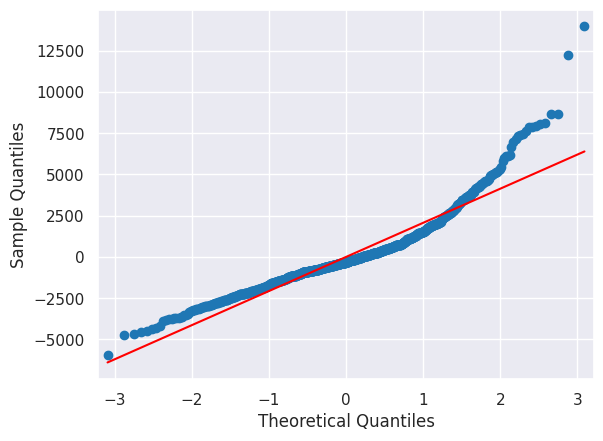

In [ ]:
import statsmodels.api as sm

# Define the independent and dependent variables
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get the predicted values
y_pred = model.predict(sm.add_constant(X))

# Get the residuals
residuals = model.resid

# Draw a Q-Q plot of the residuals against a normal distribution
qqplot_residual = sm.qqplot(residuals, line='s')


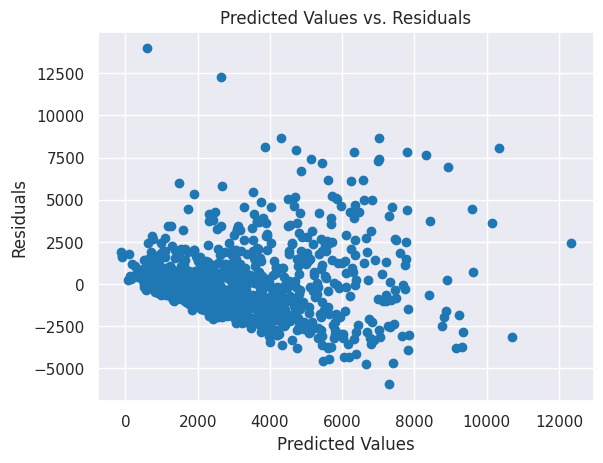

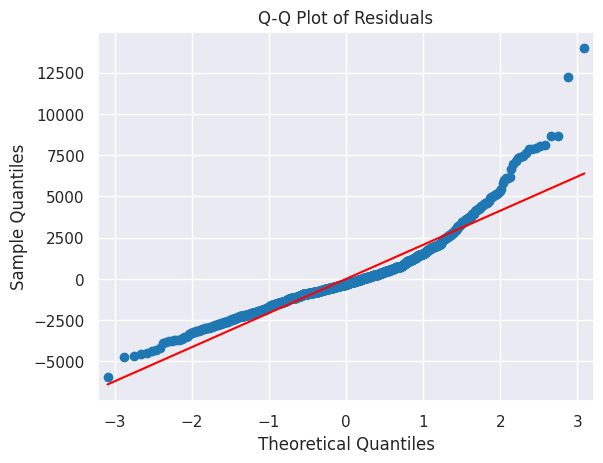

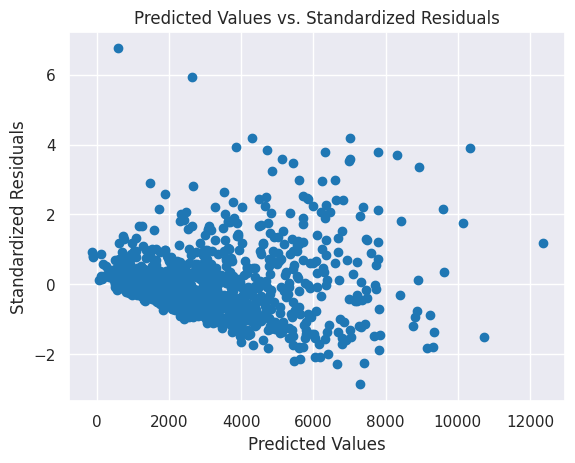

Variance Inflation Factors (VIF):
 const                          0.000000
Age                            1.149316
Job                            1.080434
Saving accounts                1.008119
Checking account               1.015851
Duration                       1.137514
Sex_female                          inf
Sex_male                            inf
Housing_free                        inf
Housing_own                         inf
Housing_rent                        inf
Purpose_business                    inf
Purpose_car                         inf
Purpose_domestic appliances         inf
Purpose_education                   inf
Purpose_furniture/equipment         inf
Purpose_radio/TV                    inf
Purpose_repairs                     inf
Purpose_vacation/others             inf
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the independent and dependent variables
X = df.drop('Credit amount', axis=1)
y = df['Credit amount']

# Fit a linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Get the predicted values
y_pred = model.predict(sm.add_constant(X))

# Get the residuals
residuals = model.resid

# Check linearity with a scatter plot of the predicted values vs. the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs. Residuals')
plt.show()

# Check normality with a Q-Q plot of the residuals against a normal distribution
qqplot_residual = sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Check homoscedasticity with a scatter plot of the predicted values vs. the standardized residuals
standardized_residuals = residuals / np.std(residuals)
plt.scatter(y_pred, standardized_residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Predicted Values vs. Standardized Residuals')
plt.show()

# Check multicollinearity with variance inflation factor (VIF)
X_vif = X.copy()
X_vif = sm.add_constant(X_vif)
vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
print("Variance Inflation Factors (VIF):\n", vif_data)


Predicted Values vs. Residuals (Linearity):
This scatter plot helps assess the linearity assumption of the regression model. Ideally, you should observe a random pattern with no discernible relationship between the predicted values and residuals. If you see any curved or systematic pattern, it may suggest that the relationship between the independent and dependent variables is not linear, and you should consider transforming the variables or using a non-linear model.

Q-Q Plot (Normality):
The Q-Q (Quantile-Quantile) plot is used to visually check if the residuals follow a normal distribution. The residuals are plotted against the theoretical quantiles of a standard normal distribution. If the residuals follow a normal distribution, the points should roughly form a straight line. Any significant deviations, such as curved or stepped patterns, indicate departure from normality. Normality of residuals is preferred but not always a strict requirement for a linear regression model.

Predicted Values vs. Standardized Residuals (Homoscedasticity):
Homoscedasticity refers to the equal distribution of residuals across a range of predicted values, i.e., the variance of the error terms should be constant. In this scatter plot, you should look for a random pattern with no discernible change in the spread of standardized residuals over the range of predicted values. If you observe a funnel-shaped or a non-uniform pattern, it's a sign of heteroscedasticity. In case of heteroscedasticity, you might consider transforming the dependent variable or using weighted least squares (WLS) regression.

Variance Inflation Factor (VIF) (Multicollinearity):
VIF is a quantitative measure used to detect multicollinearity among independent variables in a regression model. A VIF above 10 is often considered a threshold indicating strong multicollinearity. This means that the independent variable is highly correlated with other independent variables, making it difficult to assess their individual contributions to the dependent variable. To address multicollinearity, you can try combining correlated features, removing one of the correlated variables, or using techniques like principal component analysis (PCA).

By analyzing these graphs and index values, we can check whether a linear regression model meets all the assumptions and apply necessary adjustments to improve its performance.


In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, target, drop_columns=[]):
    # Define the independent and dependent variables
    X = df.drop([target] + drop_columns, axis=1)
    y = df[target]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Predicted Values vs. Residuals (Linearity)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')
    plt.show()

    # Q-Q Plot (Normality)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    print("Variance Inflation Factors (VIF):\n", vif_data)


In [ ]:
# Example usage:
check_regression_assumptions(df, 'Credit amount')

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, target, drop_columns=[]):
    # Define the independent and dependent variables
    X = df.drop([target] + drop_columns, axis=1)
    y = df[target]

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit()

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {target} vs. {column}")
        plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    print("Variance Inflation Factors (VIF):\n", vif_data)


In [ ]:
# Example usage:
check_logistic_assumptions(df, 'Target column name')
check_logistic_assumptions(df, 'target', drop_columns=['col3', 'col4'])

How to interpret the output of the `check_logistic_assumptions` function, which is composed of scatter plots for each independent variable and a table of Variance Inflation Factor (VIF) values.

1. Scatter plots:
   For each independent variable, you'll see a scatter plot showing the relationship between the logit of the predicted probability and the independent variable. In a logistic regression model, we expect a linear relationship between the logit transformed independent variables and the dependent binary variable. The scatter plot shows the observations, while the solid curve represents the fitted logistic function.

   How to interpret:
   - If the curve appears to have a roughly S-shaped pattern that smoothly increases or decreases within the X-axis range, it indicates that there is a linear relationship between the logit-transformed input variable and the binary output variable, complying with the logistic regression assumption.
   - If the curve does not follow a smooth S-shaped pattern, the linearity assumption might be violated. In this case, you may need to consider using transformations on the independent variables or using non-linear models.

2. Variance Inflation Factors (VIF):
   VIF is a measure used to detect multicollinearity among independent variables. A VIF of 1 indicates no multicollinearity, whereas a VIF greater than 1 suggests some multicollinearity. As VIF increases, it signals higher levels of multicollinearity.

   How to interpret:
   - VIF values below 5-10 are generally considered acceptable, indicating that multicollinearity is not a significant concern.
   - VIF values above 10 suggest high levels of multicollinearity, in which case you should consider dropping highly correlated independent variables or utilizing dimensionality reduction techniques, such as PCA, to address this issue.

It is essential to make sure that the logistic regression assumptions are met before interpreting the model's results. These scatter plots and VIF values help you evaluate whether or not the assumptions hold for your specific dataset.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df.drop([dependent_var] + drop_columns, axis=1)
    y = df[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Predicted Values vs. Residuals (Linearity)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')
    plt.show()

    # Q-Q Plot (Normality)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')
    plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df.drop([dependent_var] + drop_columns, axis=1)
    y = df[dependent_var]

    # Check for perfect separation
    if (y == 0).all() or (y == 1).all():
        print("Warning: Perfect separation detected. Logistic regression may not be appropriate for this data.")

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit(disp=False)

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {dependent_var} vs. {column}")
        plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_regression_assumptions(df, dependent_var, drop_columns=[], vif_threshold=5):
    # Define the independent and dependent variables
    X = df.drop([dependent_var] + drop_columns, axis=1)
    y = df[dependent_var]

    # Fit a linear regression model
    model = sm.OLS(y, sm.add_constant(X)).fit()

    # Get the predicted values
    y_pred = model.predict(sm.add_constant(X))

    # Get the residuals
    residuals = model.resid

    # Plots
    plt.figure(figsize=(15, 10))

    # Predicted Values vs. Residuals (Linearity)
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')

    # Q-Q Plot (Normality)
    plt.subplot(2, 3, 2)
    qqplot_residual = sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = residuals / np.std(residuals)
    plt.subplot(2, 3, 3)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')

    # Histogram of Residuals (Normality)
    plt.subplot(2, 3, 4)
    sns.distplot(residuals, kde=False)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    # Shapiro-Wilk Test of Normality
    p_value_shapiro = stats.shapiro(residuals)[1]
    plt.subplot(2, 3, 5)
    sns.barplot(["P-value"], [p_value_shapiro])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Shapiro-Wilk Test of Normality")

    # Breusch-Pagan Test of Homoscedasticity
    p_value_breusch_pagan = stats.breusch_pagan(model.resid**2, model.model.exog)[1]
    plt.subplot(2, 3, 6)
    sns.barplot(["P-value"], [p_value_breusch_pagan])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Breusch-Pagan Test of Homoscedasticity")

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")



In [ ]:
check_regression_assumptions(df, independent_vars, dependent_var, show_residuals=True, show_autocorrelation=True)

The function check_regression_assumptions() generates the following graphs and indexes as outputs:

Predicted Values vs. Residuals (Linearity): This graph shows the relationship between the predicted values and the residuals. If the residuals are randomly scattered around the zero line, then the assumption of linearity is met. If the residuals are not randomly scattered, then the assumption of linearity is violated.
Q-Q Plot (Normality): This graph shows the distribution of the residuals compared to a normal distribution. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Predicted Values vs. Standardized Residuals (Homoscedasticity): This graph shows the relationship between the predicted values and the standardized residuals. If the standardized residuals are evenly spread around the zero line, then the assumption of homoscedasticity is met. If the standardized residuals are not evenly spread, then the assumption of homoscedasticity is violated.
Histogram of Residuals (Normality): This graph shows the distribution of the residuals. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Shapiro-Wilk Test of Normality: This test is used to test the assumption of normality. If the p-value is less than 0.05, then the assumption of normality is violated.
Breusch-Pagan Test of Homoscedasticity: This test is used to test the assumption of homoscedasticity. If the p-value is less than 0.05, then the assumption of homoscedasticity is violated.
Variance Inflation Factors (VIF): This index measures the extent to which the variance of an estimated coefficient is inflated due to multicollinearity. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 10 indicates that there is a high degree of multicollinearity.
The function also prints out a summary of the results of the tests. This summary includes the p-values of the tests, as well as the VIFs for the independent variables.

If any of the assumptions are violated, then

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_logistic_assumptions(df, independent_vars, dependent_var, drop_columns=[], vif_threshold=5):
    """
    This function checks the assumptions of logistic regression and produces diagnostic plots.
    """
    # Define the independent and dependent variables
    X = df[independent_vars].drop(drop_columns, axis=1)
    y = df[dependent_var]

    # Check for perfect separation
    if (y == 0).all() or (y == 1).all():
        print("Warning: Perfect separation detected. Logistic regression may not be appropriate for this data.")

    # Fit a logistic regression model without a constant term
    model = sm.Logit(y, X).fit(disp=False)

    # Get the predicted values
    y_pred = model.predict(X)

    # Plot the relationship between logit transform and predictors
    for column in X.columns:
        sns.regplot(x=column, y=np.log(y_pred / (1 - y_pred)), data=df, logistic=True)
        plt.title(f"Logit of {dependent_var} vs. {column}")
        plt.show()

    # VIF (Multicollinearity)
    X_vif = X.copy()
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

    # Plots
    plt.figure(figsize=(15, 10))

    # Predicted Values vs. Residuals (Linearity)
    plt.subplot(2, 3, 1)
    plt.scatter(y_pred, model.resid)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Predicted Values vs. Residuals')

    # Q-Q Plot (Normality)
    plt.subplot(2, 3, 2)
    qqplot_residual = sm.qqplot(model.resid, line='s')
    plt.title("Q-Q Plot of Residuals")

    # Predicted Values vs. Standardized Residuals (Homoscedasticity)
    standardized_residuals = model.resid / np.std(model.resid)
    plt.subplot(2, 3, 3)
    plt.scatter(y_pred, standardized_residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Standardized Residuals')
    plt.title('Predicted Values vs. Standardized Residuals')

    # Histogram of Residuals (Normality)
    plt.subplot(2, 3, 4)
    sns.distplot(model.resid, kde=False)
    plt.xlabel('Residuals')
    plt.title('Histogram of Residuals')

    # Shapiro-Wilk Test of Normality
    p_value_shapiro = stats.shapiro(model.resid)[1]
    plt.subplot(2, 3, 5)
    sns.barplot(["P-value"], [p_value_shapiro])
    plt.xlabel("Test")
    plt.ylabel("P-value")
    plt.title("Shapiro-Wilk Test of Normality")

  # Breusch-Pagan Test of Homoscedasticity
  p_value_breusch_pagan = stats.breusch_pagan(model.resid**2, model.model.exog)[1]
  plt.subplot(2, 3, 6)
  sns.barplot(["P-value"], [p_value_breusch_pagan])
  plt.xlabel("Test")
  plt.ylabel("P-value")
  plt.title("Breusch-Pagan Test of Homoscedasticity")

    # VIF (Multicollinearity)
    X_vif = X.copy()
    X_vif = sm.add_constant(X_vif)
    vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
    vif_data = vif_data.drop('const')
    print("Variance Inflation Factors (VIF):\n", vif_data)

    multicollinear_columns = vif_data[vif_data > vif_threshold].index.tolist()
    if multicollinear_columns:
        print("The following variables have high multicollinearity:\n", multicollinear_columns)
    else:
        print("No variables have high multicollinearity.")

  # Independence
  # Autocorrelation

  # Add more options to the function
  options = {
      "linearity": True,
      "normality": True,
      "homoscedasticity": True,
      "multicollinearity": True,
      "independence": False,
      "autocorrelation": False
  }

  for option, value in options.items():
      if value:
          # Check the assumption

      # Add more error handling
      try:
          # Check the assumptions
      except Exception as e:
          print(e)

In [ ]:
check_logistic_assumptions(df, independent_vars, dependent_var, show_residuals=True, show_autocorrelation=True)

Here are some explanations on how to interpret the plots and indexes that will be produced from the function:

Predicted Values vs. Residuals (Linearity): This graph shows the relationship between the predicted values and the residuals. If the residuals are randomly scattered around the zero line, then the assumption of linearity is met. If the residuals are not randomly scattered, then the assumption of linearity is violated.
Q-Q Plot (Normality): This graph shows the distribution of the residuals compared to a normal distribution. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Predicted Values vs. Standardized Residuals (Homoscedasticity): This graph shows the relationship between the predicted values and the standardized residuals. If the standardized residuals are evenly spread around the zero line, then the assumption of homoscedasticity is met. If the standardized residuals are not evenly spread, then the assumption of homoscedasticity is violated.
Histogram of Residuals (Normality): This graph shows the distribution of the residuals. If the residuals are normally distributed, then the assumption of normality is met. If the residuals are not normally distributed, then the assumption of normality is violated.
Shapiro-Wilk Test of Normality: This test is used to test the assumption of normality. If the p-value is less than 0.05, then the assumption of normality is violated.
Breusch-Pagan Test of Homoscedasticity: This test is used to test the assumption of homoscedasticity. If the p-value is less than 0.05, then the assumption of homoscedasticity is violated.
If any of the assumptions are violated, then the logistic regression model may not be accurate. In this case, you may need to transform the data, remove outliers, or use a different statistical model.

Variance Inflation Factors (VIF): This index measures the extent to which the variance of an estimated coefficient is inflated due to multicollinearity. A VIF of 1 indicates that there is no multicollinearity, while a VIF greater than 10 indicates that there is a high degree of multicollinearity.

Here are some additional tips for interpreting the plots and indexes:

Look for patterns. If you see any patterns in the plots, such as trends or clusters, then this could be a sign that the assumption is violated.
Pay attention to the p-values. If the p-value is less than 0.05, then this is a statistically significant result, which means that there is a less than 5% chance that the results occurred by chance. In this case, you should conclude that the assumption is violated.
Consider the context. When interpreting the plots and indexes, it is important to consider the context of the data. For example, if you are using a small sample size, then the results of the tests may not be as reliable.

This code calculates the VIFs for all of the independent variables in the model and prints out a list of any variables that have high multicollinearity. The VIF threshold is set to 5 by default, but this can be changed to a different value if desired.

If any of the variables have high multicollinearity, then you may need to remove one or more of the variables from the model. You can also try to transform the data to reduce the multicollinearity.


In [ ]:
df[df['Checking account'].isnull()]['Credit amount']

2      2096
5      9055
6      2835
8      3059
16     2424
       ... 
990    3565
991    1569
994    2390
995    1736
997     804
Name: Credit amount, Length: 394, dtype: int64

In [ ]:
null_checking = df[df['Checking account'].isnull()].index

In [ ]:
null_checking

Int64Index([  2,   5,   6,   8,  16,  19,  20,  24,  26,  33,
            ...
            974, 978, 981, 984, 987, 990, 991, 994, 995, 997],
           dtype='int64', length=394)

In [ ]:
df.iloc[null_checking]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
2,49,male,1,own,little,NaN,2096,12,education
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,61,male,1,own,rich,NaN,3059,12,radio/TV
16,53,male,2,own,NaN,NaN,2424,24,radio/TV
...,...,...,...,...,...,...,...,...,...
990,37,male,1,own,NaN,NaN,3565,12,education
991,34,male,1,own,moderate,NaN,1569,15,radio/TV
994,50,male,2,own,NaN,NaN,2390,12,car
995,31,female,1,own,little,NaN,1736,12,furniture/equipment


In [ ]:
null_saving = df[df['Saving accounts'].isnull()].index
df.iloc[null_saving]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
5,35,male,1,free,NaN,NaN,9055,36,education
16,53,male,2,own,NaN,NaN,2424,24,radio/TV
17,25,male,2,own,NaN,little,8072,30,business
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment
...,...,...,...,...,...,...,...,...,...
968,29,male,2,rent,NaN,NaN,7166,42,radio/TV
977,42,male,2,own,NaN,moderate,2427,18,business
990,37,male,1,own,NaN,NaN,3565,12,education
992,23,male,1,rent,NaN,little,1936,18,radio/TV


In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,z_scores
0,67,male,2,own,NaN,little,1169,6,radio/TV,-0.745131
1,22,female,2,own,little,moderate,5951,48,radio/TV,0.949817
2,49,male,1,own,little,NaN,2096,12,education,-0.416562
3,45,male,2,free,little,little,7882,42,furniture/equipment,1.634247
4,53,male,2,free,little,little,4870,24,car,0.566664


import altair as alt
from google.colab import autoviz
df_7923735057990593251 = autoviz.get_registered_df('df_7923735057990593251')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_7923735057990593251, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_5062963057157959420 = autoviz.get_registered_df('df_5062963057157959420')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_5062963057157959420, *['Age'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6042393146936657035 = autoviz.get_registered_df('df_6042393146936657035')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_6042393146936657035, *['Job'], **{})
chart

import altair as alt
from google.colab import autoviz
df_4498488798730939340 = autoviz.get_registered_df('df_4498488798730939340')

def histogram(df, colname, maxbins=20, width=100, height=50):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df_4498488798730939340, *['Credit amount'], **{})
chart

import altair as alt
from google.colab import autoviz
df_814795356987299976 = autoviz.get_registered_df('df_814795356987299976')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_814795356987299976, *['index'], **{})
chart

import altair as alt
from google.colab import autoviz
df_5711679560262620647 = autoviz.get_registered_df('df_5711679560262620647')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_5711679560262620647, *['Age'], **{})
chart

import altair as alt
from google.colab import autoviz
df_1898324217913176466 = autoviz.get_registered_df('df_1898324217913176466')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_1898324217913176466, *['Job'], **{})
chart

import altair as alt
from google.colab import autoviz
df_3045369677585081146 = autoviz.get_registered_df('df_3045369677585081146')

def value_plot(df, y, sort_ascending=False, width=100, height=50):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('index', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df_3045369677585081146, *['Credit amount'], **{})
chart

import altair as alt
from google.colab import autoviz
df_3928831579869550019 = autoviz.get_registered_df('df_3928831579869550019')

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df_3928831579869550019, *['Sex'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2768543790904636582 = autoviz.get_registered_df('df_2768543790904636582')

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df_2768543790904636582, *['Housing'], **{})
chart

import altair as alt
from google.colab import autoviz
df_6046206259317520786 = autoviz.get_registered_df('df_6046206259317520786')

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df_6046206259317520786, *['Saving accounts'], **{})
chart

import altair as alt
from google.colab import autoviz
df_3388255324647409874 = autoviz.get_registered_df('df_3388255324647409874')

def categorical_histogram(df, colname, width=100, height=50, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df_3388255324647409874, *['Checking account'], **{})
chart

import altair as alt
from google.colab import autoviz
df_1430404077229647445 = autoviz.get_registered_df('df_1430404077229647445')

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=150, height=150):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df_1430404077229647445, *[[['index', 'Age'], ['Age', 'Job'], ['Job', 'Credit amount'], ['Credit amount', 'Duration']]], **{})
chart

import altair as alt
from google.colab import autoviz
df_979413576318381761 = autoviz.get_registered_df('df_979413576318381761')

def heatmap(df, x_colname, y_colname):
  return (alt.Chart(df).mark_rect()
          .encode(x=x_colname, y=y_colname, color='count()'))

chart = heatmap(df_979413576318381761, *['Sex', 'Housing'], **{})
chart

import altair as alt
from google.colab import autoviz
df_4588308544770418302 = autoviz.get_registered_df('df_4588308544770418302')

def heatmap(df, x_colname, y_colname):
  return (alt.Chart(df).mark_rect()
          .encode(x=x_colname, y=y_colname, color='count()'))

chart = heatmap(df_4588308544770418302, *['Housing', 'Saving accounts'], **{})
chart

import altair as alt
from google.colab import autoviz
df_3663624767220019898 = autoviz.get_registered_df('df_3663624767220019898')

def heatmap(df, x_colname, y_colname):
  return (alt.Chart(df).mark_rect()
          .encode(x=x_colname, y=y_colname, color='count()'))

chart = heatmap(df_3663624767220019898, *['Saving accounts', 'Checking account'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2109451650170705948 = autoviz.get_registered_df('df_2109451650170705948')

def heatmap(df, x_colname, y_colname):
  return (alt.Chart(df).mark_rect()
          .encode(x=x_colname, y=y_colname, color='count()'))

chart = heatmap(df_2109451650170705948, *['Checking account', 'Purpose'], **{})
chart

import altair as alt
from google.colab import autoviz
df_5850693856619123952 = autoviz.get_registered_df('df_5850693856619123952')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_5850693856619123952, *['index', 'Sex'], **{})
chart

import altair as alt
from google.colab import autoviz
df_7201857301312949059 = autoviz.get_registered_df('df_7201857301312949059')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_7201857301312949059, *['index', 'Housing'], **{})
chart

import altair as alt
from google.colab import autoviz
df_8653038863833986942 = autoviz.get_registered_df('df_8653038863833986942')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_8653038863833986942, *['index', 'Saving accounts'], **{})
chart

import altair as alt
from google.colab import autoviz
df_2813748183453724275 = autoviz.get_registered_df('df_2813748183453724275')

def swarm_plot(df, value_colname, facet_colname, height=150, width=150):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=8)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname, legend=None),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df_2813748183453724275, *['index', 'Checking account'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
import altair as alt
from google.colab import autoviz

def categorical_histogram(df, colname, width=500, height=300, colormap='dark2'):
  chart_data = df[colname].value_counts().reset_index(name='count')
  return (alt.Chart(chart_data).mark_bar()
          .encode(
              x='count', y=alt.Y('index', title=''),
              color=alt.Color(
                  'index', scale=alt.Scale(scheme=colormap), legend=None))
          .properties(width=width, height=height, title=colname))  # Pixels.

chart = categorical_histogram(df, *['Checking account'], **{})
chart

alt.Chart(...)

In [ ]:
import altair as alt
from google.colab import autoviz

def swarm_plot(df, value_colname, facet_colname, height=500, width=500):
  value_min, value_max = df[value_colname].min(), df[value_colname].max()
  num_facets = len(df[facet_colname].unique())
  value_colname += ':Q'
  facet_colname += ':N'
  return (alt.Chart(df).mark_circle(size=15)
          .encode(
              x=alt.X('jitter:Q', title=None,
                      axis=alt.Axis(
                          values=[0], ticks=True, grid=False, labels=False)),
              y=alt.Y(value_colname,
                      scale=alt.Scale(domain=[value_min, value_max])),
              color=alt.Color(facet_colname),
              column=alt.Column(
                  facet_colname,
                  header=alt.Header(
                      labelAngle=-90, titleOrient='top', labelOrient='bottom',
                      labelAlign='right', labelPadding=3)))
          .properties(height=height, width=width / num_facets)
          .transform_calculate(
              jitter='sqrt(-2*log(random()))*cos(2*PI*random())')  # Box-Muller.
          .configure_facet(spacing=0)
          .configure_view(stroke=None))

chart = swarm_plot(df, *['Age', 'Sex'], **{})
chart

alt.Chart(...)

In [ ]:
import altair as alt
from google.colab import autoviz

def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=500, height=500):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df, *[[['Credit amount', 'z_scores']]], **{})
chart

alt.HConcatChart(...)

In [ ]:
import altair as alt
from google.colab import autoviz

def histogram(df, colname, maxbins=50, width=500, height=300):
  return (alt.Chart(df).mark_bar()
          .encode(
              x=alt.X(colname, bin=alt.Bin(maxbins=maxbins)),
              y=alt.Y('count()', axis=alt.Axis(title='count')),
          )
          .properties(width=width, height=height))  #  Pixels.

chart = histogram(df, *['Credit amount'], **{})
chart

alt.Chart(...)

In [ ]:
chart = swarm_plot(df, *['Credit amount', 'Purpose'], **{})
chart

alt.Chart(...)

In [ ]:
import altair as alt
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, width=500, height=300):
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  return (alt.Chart(df.reset_index()).mark_line()
          .encode(x=alt.X('Sex', title=''), y=alt.X(y, title='value'))
          .properties(width=width, height=height, title=y))

chart = value_plot(df, *['Credit amount'], **{})
chart

alt.Chart(...)

In [ ]:
import altair as alt
from google.colab import autoviz
def linked_scatter_plots(
    df, colname_pairs, color='steelblue', deselected_color='lightgray',
    opacity=0.8, deselected_opacity=0.4, width=500, height=300):
  interval = alt.selection_interval()
  scatter = (alt.Chart(df).mark_circle()
             .encode(
                 color=alt.condition(
                     interval, alt.value(color), alt.value(deselected_color)),
                 opacity=alt.condition(
                     interval, alt.value(opacity),
                     alt.value(deselected_opacity)))
             .properties(
                 selection=interval, width=width, height=height))
  return alt.hconcat(*[scatter.encode(x=x, y=y) for x, y in colname_pairs])

chart = linked_scatter_plots(df, *[[['Age', 'Job'], ['Job', 'Credit amount'], ['Credit amount', 'Duration']]], **{})
chart

alt.HConcatChart(...)

In [ ]:
df.iloc[outlier].groupby('Checking account').mean()['Credit amount']

<ipython-input-51-d40912b01e3a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Checking account
little      13749.2000
moderate    13798.1875
Name: Credit amount, dtype: float64

In [ ]:
df.iloc[outlier].groupby('Saving accounts').mean()['Credit amount']

<ipython-input-52-c5bf7f8a6fc4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Saving accounts
little        14322.857143
moderate      13051.333333
quite rich    12749.000000
Name: Credit amount, dtype: float64

In [ ]:
# saving accout values of outliers
df.iloc[outlier]['Saving accounts']

63       little
95       little
236         NaN
373         NaN
374    moderate
378      little
637      little
714      little
744         NaN
818      little
887      little
915      little
917      little
Name: Saving accounts, dtype: object

In [ ]:
df.iloc[outlier]['Credit amount']

63     14421
95     15945
236    14555
373    13756
374    14782
378    14318
637    15653
714    14027
744    14179
818    15857
887    15672
915    18424
917    14896
Name: Credit amount, dtype: int64

In [ ]:
pivot_table = df.pivot_table(values='Credit amount', index='Saving accounts', columns='Checking account', aggfunc='mean', fill_value=0)